In [1]:
import pandas as pd

# Load the datasets
weather_data = pd.read_csv('final_weather.csv')
accident_data = pd.read_csv('nypd-accidents.csv')

# Display the first few rows of each dataset to understand their structure
weather_data_head = weather_data.head()
accident_data_head = accident_data.head()

(weather_data_head, accident_data_head)


(   Unnamed: 0        date  maximum temperature  minimum temperature  \
 0           0  2016-01-01                   42                   34   
 1           1  2016-01-02                   40                   32   
 2           2  2016-01-03                   45                   35   
 3           3  2016-01-04                   36                   14   
 4           4  2016-01-05                   29                   11   
 
    average temperature precipitation snow fall snow depth  
 0                 38.0          0.00       0.0          0  
 1                 36.0          0.00       0.0          0  
 2                 40.0          0.00       0.0          0  
 3                 25.0          0.00       0.0          0  
 4                 20.0          0.00       0.0          0  ,
    UNIQUE KEY        DATE  TIME   BOROUGH  ZIP CODE   LATITUDE  LONGITUDE  \
 0     3146911  01/01/2015  0:20    QUEENS   11358.0  40.751847 -73.787862   
 1     3146180  01/01/2015  0:20       NaN 

In [2]:
# Convert 'T' to 0.01 in precipitation, snow fall, and snow depth columns
weather_data['precipitation'] = weather_data['precipitation'].replace('T', 0.01)
weather_data['snow fall'] = weather_data['snow fall'].replace('T', 0.01)
weather_data['snow depth'] = weather_data['snow depth'].replace('T', 0.01)

# Convert these columns to numeric
weather_data['precipitation'] = pd.to_numeric(weather_data['precipitation'], errors='coerce')
weather_data['snow fall'] = pd.to_numeric(weather_data['snow fall'], errors='coerce')
weather_data['snow depth'] = pd.to_numeric(weather_data['snow depth'], errors='coerce')

# Display the modified weather data
weather_data.head()

,Unnamed: 0,date,maximum temperature,minimum temperature,average temperature,precipitation,snow fall,snow depth
0,0,2016-01-01,42,34,38.0,0.0,0.0,0.0
1,1,2016-01-02,40,32,36.0,0.0,0.0,0.0
2,2,2016-01-03,45,35,40.0,0.0,0.0,0.0
3,3,2016-01-04,36,14,25.0,0.0,0.0,0.0
4,4,2016-01-05,29,11,20.0,0.0,0.0,0.0


In [3]:
# Cleaning and preprocessing accident data

# Convert 'DATE' in accident data to datetime for merging
accident_data['DATE'] = pd.to_datetime(accident_data['DATE'], errors='coerce')

# Check for missing values in key columns and data types
accident_data_info = accident_data.info()

# Merging the datasets on the date field
# First, ensure the 'date' field in weather data is also in datetime format
weather_data['date'] = pd.to_datetime(weather_data['date'], errors='coerce')

# Merge the datasets
merged_data = pd.merge(accident_data, weather_data, left_on='DATE', right_on='date', how='left')

# Display info of the merged dataset and first few rows
merged_data_info = merged_data.info()
merged_data_head = merged_data.head()

(merged_data_info, merged_data_head)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 477732 entries, 0 to 477731
Data columns (total 29 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   UNIQUE KEY           477732 non-null  int64         
 1   DATE                 477732 non-null  datetime64[ns]
 2   TIME                 477732 non-null  object        
 3   BOROUGH              338390 non-null  object        
 4   ZIP CODE             338329 non-null  float64       
 5   LATITUDE             356600 non-null  float64       
 6   LONGITUDE            356600 non-null  float64       
 7   LOCATION             356600 non-null  object        
 8   ON STREET NAME       364552 non-null  object        
 9   CROSS STREET NAME    335574 non-null  object        
 10  OFF STREET NAME      58511 non-null   object        
 11  PERSONS INJURED      477732 non-null  int64         
 12  PERSONS KILLED       477732 non-null  int64         
 13  PEDESTRIANS IN

(None,
    UNIQUE KEY       DATE  TIME   BOROUGH  ZIP CODE   LATITUDE  LONGITUDE  \
 0     3146911 2015-01-01  0:20    QUEENS   11358.0  40.751847 -73.787862   
 1     3146180 2015-01-01  0:20       NaN       NaN  40.771289 -73.946693   
 2     3146384 2015-01-01  0:21  BROOKLYN   11205.0  40.689445 -73.955121   
 3     3146013 2015-01-01  0:30  BROOKLYN   11213.0  40.673845 -73.925080   
 4     3146120 2015-01-01  0:33       NaN       NaN        NaN        NaN   
 
                     LOCATION    ON STREET NAME   CROSS STREET NAME  ...  \
 0   (40.7518471, -73.787862)         47 AVENUE          193 STREET  ...   
 1  (40.7712888, -73.9466928)               NaN                 NaN  ...   
 2  (40.6894449, -73.9551212)    BEDFORD AVENUE    LAFAYETTE AVENUE  ...   
 3  (40.6738445, -73.9250801)    BUFFALO AVENUE  SAINT MARKS AVENUE  ...   
 4                        NaN  RICHMOND TERRACE        SOUTH AVENUE  ...   
 
   VEHICLE 4 FACTOR  VEHICLE 5 FACTOR  Unnamed: 0  date  maximum temper

In [4]:
# Cleaning and preprocessing accident data

# Convert 'DATE' in accident data to datetime for merging
accident_data['DATE'] = pd.to_datetime(accident_data['DATE'], errors='coerce')

# Check for missing values in key columns and data types
accident_data_info = accident_data.info()

# Merging the datasets on the date field
# First, ensure the 'date' field in weather data is also in datetime format
weather_data['date'] = pd.to_datetime(weather_data['date'], errors='coerce')

# Merge the datasets
merged_data = pd.merge(accident_data, weather_data, left_on='DATE', right_on='date', how='left')

# Display info of the merged dataset and first few rows
merged_data_info = merged_data.info()
merged_data_head = merged_data.head()

(merged_data_info, merged_data_head)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 477732 entries, 0 to 477731
Data columns (total 29 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   UNIQUE KEY           477732 non-null  int64         
 1   DATE                 477732 non-null  datetime64[ns]
 2   TIME                 477732 non-null  object        
 3   BOROUGH              338390 non-null  object        
 4   ZIP CODE             338329 non-null  float64       
 5   LATITUDE             356600 non-null  float64       
 6   LONGITUDE            356600 non-null  float64       
 7   LOCATION             356600 non-null  object        
 8   ON STREET NAME       364552 non-null  object        
 9   CROSS STREET NAME    335574 non-null  object        
 10  OFF STREET NAME      58511 non-null   object        
 11  PERSONS INJURED      477732 non-null  int64         
 12  PERSONS KILLED       477732 non-null  int64         
 13  PEDESTRIANS IN

(None,
    UNIQUE KEY       DATE  TIME   BOROUGH  ZIP CODE   LATITUDE  LONGITUDE  \
 0     3146911 2015-01-01  0:20    QUEENS   11358.0  40.751847 -73.787862   
 1     3146180 2015-01-01  0:20       NaN       NaN  40.771289 -73.946693   
 2     3146384 2015-01-01  0:21  BROOKLYN   11205.0  40.689445 -73.955121   
 3     3146013 2015-01-01  0:30  BROOKLYN   11213.0  40.673845 -73.925080   
 4     3146120 2015-01-01  0:33       NaN       NaN        NaN        NaN   
 
                     LOCATION    ON STREET NAME   CROSS STREET NAME  ...  \
 0   (40.7518471, -73.787862)         47 AVENUE          193 STREET  ...   
 1  (40.7712888, -73.9466928)               NaN                 NaN  ...   
 2  (40.6894449, -73.9551212)    BEDFORD AVENUE    LAFAYETTE AVENUE  ...   
 3  (40.6738445, -73.9250801)    BUFFALO AVENUE  SAINT MARKS AVENUE  ...   
 4                        NaN  RICHMOND TERRACE        SOUTH AVENUE  ...   
 
   VEHICLE 4 FACTOR  VEHICLE 5 FACTOR  Unnamed: 0  date  maximum temper

In [5]:
# Checking the date ranges of both datasets to resolve the date alignment issue
weather_date_range = (weather_data['date'].min(), weather_data['date'].max())
accident_date_range = (accident_data['DATE'].min(), accident_data['DATE'].max())

weather_date_range, accident_date_range

((Timestamp('2016-01-01 00:00:00'), Timestamp('2016-12-31 00:00:00')),
 (Timestamp('2015-01-01 00:00:00'), Timestamp('2017-02-28 00:00:00')))

In [6]:
# Filtering the accident data to match the date range of the weather data (2016)
accident_data_2016 = accident_data[(accident_data['DATE'] >= '2016-01-01') & (accident_data['DATE'] <= '2016-12-31')]

# Merging the filtered accident data with the weather data
merged_data_2016 = pd.merge(accident_data_2016, weather_data, left_on='DATE', right_on='date', how='left')

# Checking the first few rows of the newly merged dataset
merged_data_2016.head()

,UNIQUE KEY,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,...,VEHICLE 4 FACTOR,VEHICLE 5 FACTOR,Unnamed: 0,date,maximum temperature,minimum temperature,average temperature,precipitation,snow fall,snow depth
0,3374565,2016-01-01,0:01,MANHATTAN,10022.0,40.760223,-73.967462,"(40.7602226, -73.967462)",EAST 57 STREET,3 AVENUE,...,NaN,NaN,0,2016-01-01,42,34,38.0,0.0,0.0,0.0
1,3511927,2016-01-01,0:01,BROOKLYN,11235.0,NaN,NaN,NaN,EMMONS AVENUE,OCEAN AVENUE,...,NaN,NaN,0,2016-01-01,42,34,38.0,0.0,0.0,0.0
2,3363408,2016-01-01,0:01,MANHATTAN,10035.0,40.805057,-73.939034,"(40.8050573, -73.9390342)",EAST 125 STREET,PARK AVENUE,...,NaN,NaN,0,2016-01-01,42,34,38.0,0.0,0.0,0.0
3,3364610,2016-01-01,0:05,MANHATTAN,10035.0,40.799258,-73.939050,"(40.7992577, -73.9390504)",3 AVENUE,EAST 118 STREET,...,NaN,NaN,0,2016-01-01,42,34,38.0,0.0,0.0,0.0
4,3363371,2016-01-01,0:15,MANHATTAN,10011.0,40.738552,-73.999682,"(40.738552, -73.9996824)",7 AVENUE,WEST 14 STREET,...,NaN,NaN,0,2016-01-01,42,34,38.0,0.0,0.0,0.0


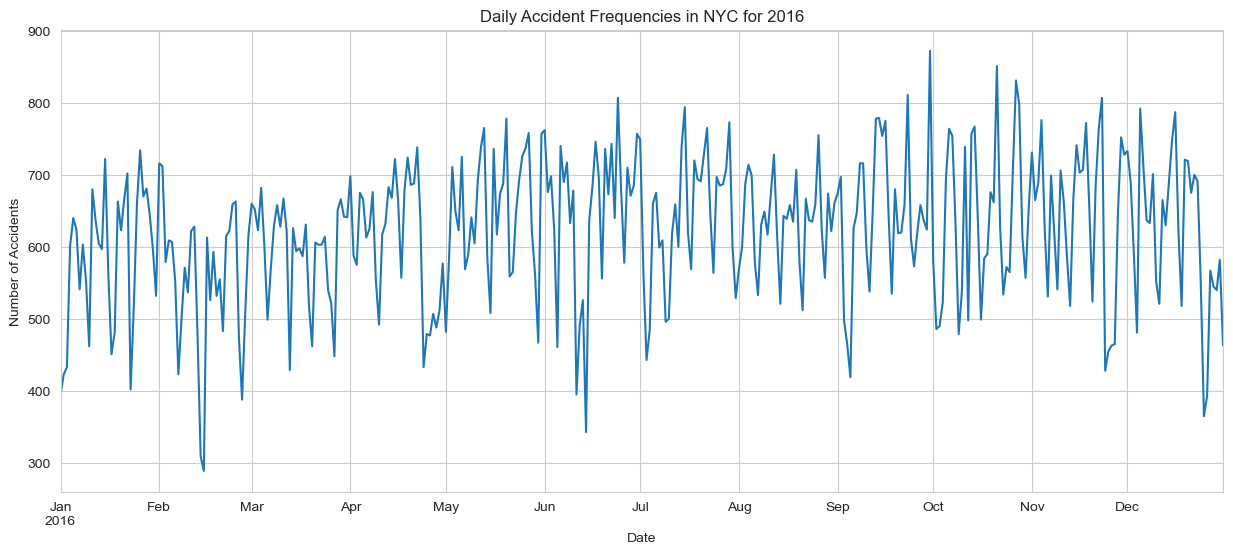

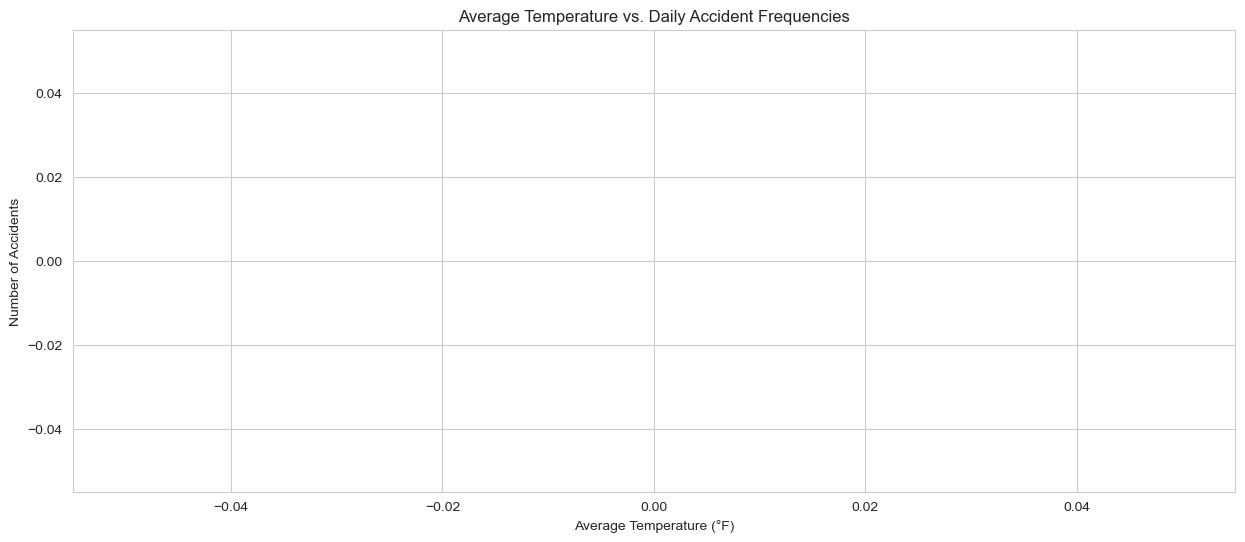

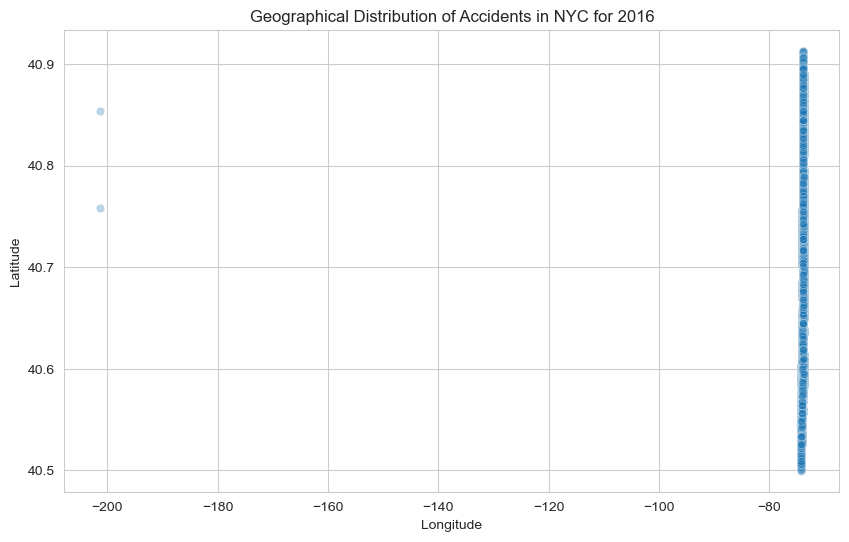

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

# 1. Temporal Trends: Accident Frequencies Over Time
# Grouping by date to count the number of accidents per day
accidents_daily = merged_data_2016.groupby('date').size()

# Plotting the daily accident frequencies
plt.figure(figsize=(15, 6))
accidents_daily.plot(title='Daily Accident Frequencies in NYC for 2016')
plt.xlabel('Date')
plt.ylabel('Number of Accidents')
plt.show()

# 2. Weather Impact: Correlation of Weather Conditions with Accidents
# Plotting average temperature vs. daily accidents
plt.figure(figsize=(15, 6))
sns.scatterplot(data=merged_data_2016, x='average temperature', y=accidents_daily)
plt.title('Average Temperature vs. Daily Accident Frequencies')
plt.xlabel('Average Temperature (°F)')
plt.ylabel('Number of Accidents')
plt.show()

# 3. Geographical Analysis: Mapping Accident Locations
# Filtering out rows with missing latitude and longitude
geo_data = merged_data_2016.dropna(subset=['LATITUDE', 'LONGITUDE'])

# Plotting accident locations
plt.figure(figsize=(10, 6))
sns.scatterplot(data=geo_data, x='LONGITUDE', y='LATITUDE', alpha=0.3)
plt.title('Geographical Distribution of Accidents in NYC for 2016')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Note: A more detailed geographical analysis would require a mapping tool like Folium or Geopandas.


In [9]:
import folium
from folium.plugins import HeatMap

# Preparing data for the geographical distribution map
# Taking a sample for visualization to avoid overloading the map
sample_geo_data = geo_data.sample(n=10000, random_state=1)

# Creating a base map
map_nyc = folium.Map(location=[40.7128, -74.0060], zoom_start=11)

# Adding a heat map layer
heat_data = [[row['LATITUDE'], row['LONGITUDE']] for index, row in sample_geo_data.iterrows()]
HeatMap(heat_data).add_to(map_nyc)

# Displaying the map
map_nyc.save("nyc_accidents_heatmap.html")
"nyc_accidents_heatmap.html"

'nyc_accidents_heatmap.html'

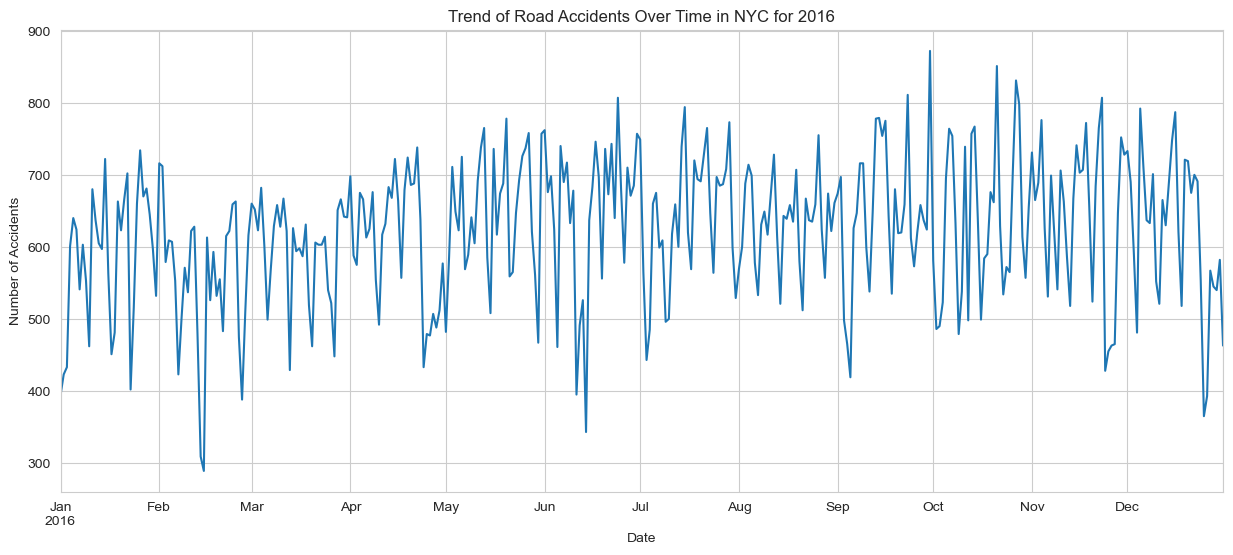

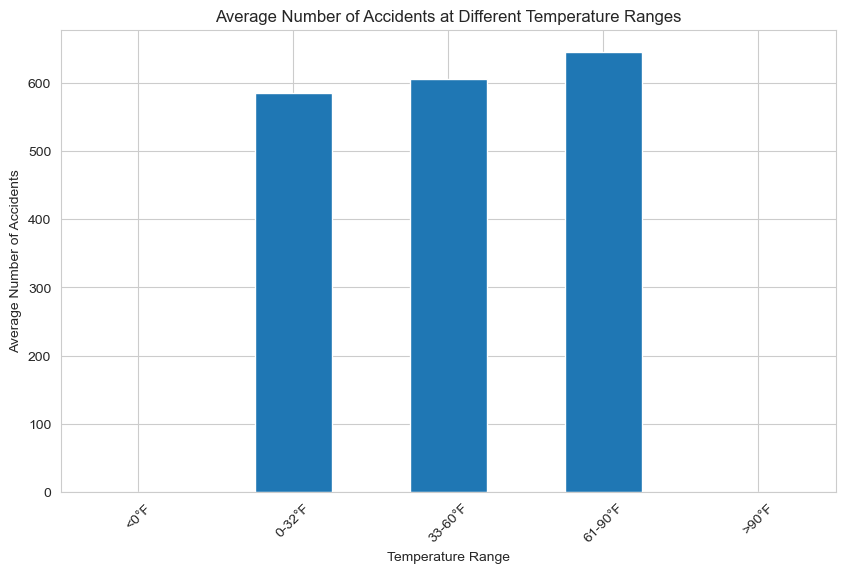

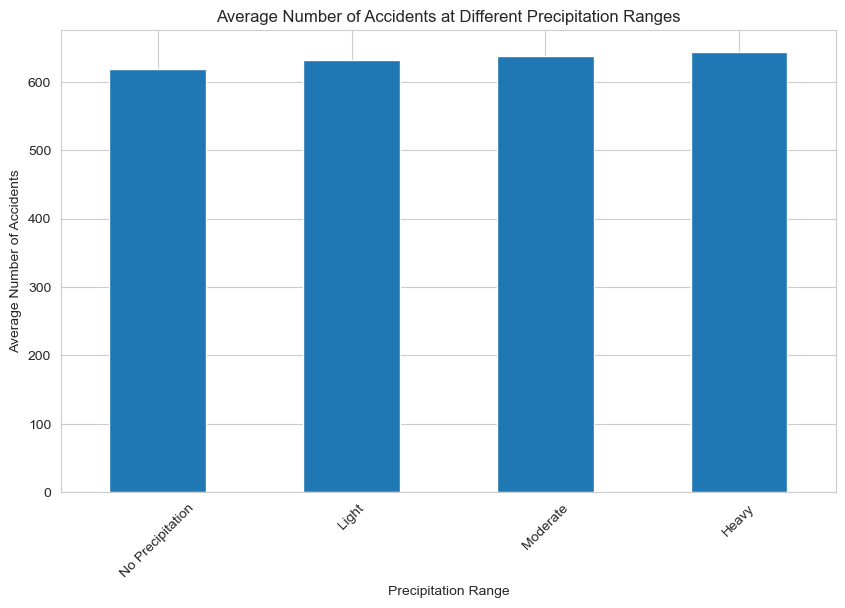

In [10]:
import numpy as np

# Trend of Road Accidents Over Time
# We already have the accidents_daily data, let's plot it
plt.figure(figsize=(15, 6))
accidents_daily.plot(title='Trend of Road Accidents Over Time in NYC for 2016')
plt.xlabel('Date')
plt.ylabel('Number of Accidents')
plt.show()

# Average Number of Accidents at Different Temperature Ranges
# Creating temperature ranges and grouping data
temperature_ranges = pd.cut(merged_data_2016['average temperature'], bins=[-10, 0, 32, 60, 90, 120], labels=['<0°F', '0-32°F', '33-60°F', '61-90°F', '>90°F'])
temp_accidents = merged_data_2016.groupby(temperature_ranges).size() / merged_data_2016.groupby(temperature_ranges)['date'].nunique()

# Plotting the average number of accidents in different temperature ranges
plt.figure(figsize=(10, 6))
temp_accidents.plot(kind='bar', title='Average Number of Accidents at Different Temperature Ranges')
plt.xlabel('Temperature Range')
plt.ylabel('Average Number of Accidents')
plt.xticks(rotation=45)
plt.show()

# Average Number of Accidents at Different Precipitation Ranges
# Defining precipitation ranges
precipitation_ranges = pd.cut(merged_data_2016['precipitation'], bins=[-0.01, 0.1, 0.5, 1, 5], labels=['No Precipitation', 'Light', 'Moderate', 'Heavy'])
precip_accidents = merged_data_2016.groupby(precipitation_ranges).size() / merged_data_2016.groupby(precipitation_ranges)['date'].nunique()

# Plotting the average number of accidents in different precipitation ranges
plt.figure(figsize=(10, 6))
precip_accidents.plot(kind='bar', title='Average Number of Accidents at Different Precipitation Ranges')
plt.xlabel('Precipitation Range')
plt.ylabel('Average Number of Accidents')
plt.xticks(rotation=45)
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import datetime

# Data Integration and Feature Engineering
# Creating a new feature for the number of accidents per day
daily_accidents = merged_data_2016.groupby('date').size().reset_index(name='accidents')

# Merging with the weather data
model_data = pd.merge(daily_accidents, weather_data, left_on='date', right_on='date')

# Adding day of the week and month as features
model_data['day_of_week'] = model_data['date'].dt.dayofweek
model_data['month'] = model_data['date'].dt.month

# Data Preprocessing
# Fill any missing values
model_data.fillna(method='ffill', inplace=True)

# Selecting features and target variable
features = ['maximum temperature', 'minimum temperature', 'average temperature', 'precipitation', 'snow fall', 'snow depth', 'day_of_week', 'month']
target = 'accidents'

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(model_data[features], model_data[target], test_size=0.2, random_state=0)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Selection
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=0),
    "Gradient Boosting": GradientBoostingRegressor(random_state=0)
}

# Model Training and Evaluation
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    predictions = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    results[name] = (mse, r2)

results


{'Linear Regression': (6939.563679056513, 0.2098833970566213),
 'Random Forest': (3993.051382432432, 0.5453638961210859),
 'Gradient Boosting': (4609.46013424537, 0.47518156023779845)}

In [12]:
from sklearn.metrics import mean_absolute_error, f1_score

# Since the task is regression, we cannot directly use classification metrics like accuracy and F1 score.
# We'll use Mean Absolute Error (MAE) as an additional metric.

# Selecting the best model (Random Forest) for further evaluation
best_model = models['Random Forest']

# Predicting on the test set
predictions = best_model.predict(X_test_scaled)

# Calculating Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)

# Getting feature importance
feature_importance = best_model.feature_importances_

# Creating a DataFrame for feature importance
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})

# Sorting the features by their importance
feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)

(mae, feature_importance_df)


(43.953378378378375,
                Feature  Importance
 6          day_of_week    0.412737
 1  minimum temperature    0.128352
 0  maximum temperature    0.123611
 7                month    0.113037
 2  average temperature    0.111106
 3        precipitation    0.094087
 5           snow depth    0.010737
 4            snow fall    0.006332)